In [26]:
#Load necessary libraries
import pylab
%pylab inline
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

Populating the interactive namespace from numpy and matplotlib


C:\Users\Umar Ibn Ali\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [27]:
#load dataset in pandas
df = pd.read_csv("/Users/Umar Ibn Ali/Desktop/FYP/Model/Bangladesh_dataset.csv")

In [28]:
#check dataset
df.head()


,Year,GPI,GDP,No of country,Density,Pos Sent,Neg Sent,Neu Sent,Population
0,1991,NaN,332,3,833.60,NaN,NaN,NaN,40260
1,1992,NaN,324,2,852.63,NaN,NaN,NaN,245154
2,1993,NaN,333,6,871.49,NaN,NaN,NaN,198954
3,1994,NaN,354,6,890.48,NaN,NaN,NaN,116228
4,1995,NaN,383,6,909.79,NaN,NaN,NaN,51118


In [29]:
#statistics of dataset
df.describe()

,Year,GPI,GDP,No of country,Density,Pos Sent,Neg Sent,Neu Sent,Population
count,27.000000,9.000000,27.000000,27.000000,27.000000,0.0,0.0,0.0,27.000000
mean,2004.000000,2.076444,649.000000,5.777778,1065.652963,NaN,NaN,NaN,130504.666667
std,7.937254,0.044702,357.000539,1.368136,131.797507,NaN,NaN,NaN,179025.710357
min,1991.000000,1.997000,324.000000,2.000000,833.600000,NaN,NaN,NaN,19792.000000
25%,1997.500000,2.058000,404.500000,5.500000,959.300000,NaN,NaN,NaN,22191.500000
50%,2004.000000,2.071000,486.000000,6.000000,1082.000000,NaN,NaN,NaN,30692.000000
75%,2010.500000,2.100000,832.500000,6.000000,1171.630000,NaN,NaN,NaN,229461.000000
max,2017.000000,2.159000,1532.000000,9.000000,1265.000000,NaN,NaN,NaN,879216.000000


In [30]:
#check the columns with missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

Year              0
GPI              18
GDP               0
No of country     0
Density           0
Pos Sent         27
Neg Sent         27
Neu Sent         27
Population        0
dtype: int64

In [31]:
#Fill Missing values
l = df['GPI'].mean()
df['GPI'].fillna(l,inplace = True)

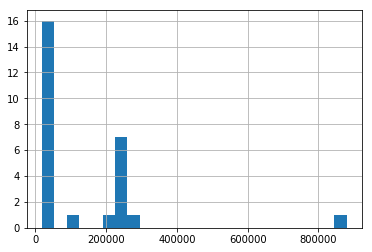

In [32]:
#check population histogram
df['Population'].hist(bins=25)

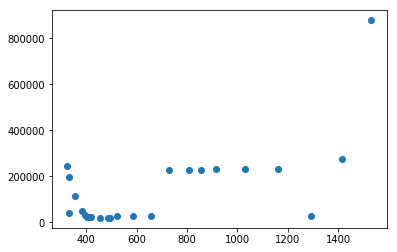

In [33]:
#check relationship between GDP and Population
import matplotlib.pyplot as plt
plt.scatter(df['GDP'], df['Population'])
plt.show() 

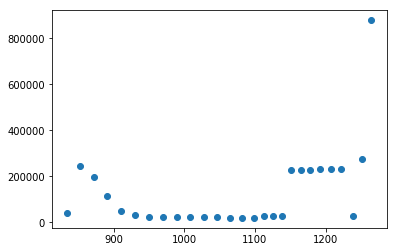

In [34]:
#check relationship between Density and Population
plt.scatter(df['Density'], df['Population'])
plt.show() 

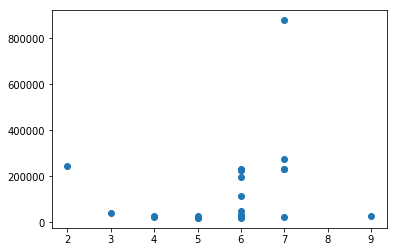

In [35]:
#check relationship between No of country and Population
plt.scatter(df['No of country'], df['Population'])
plt.show() 

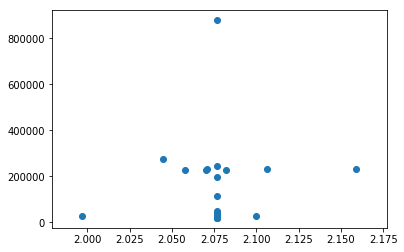

In [36]:
#check relationship between GPI and Population
plt.scatter(df['GPI'], df['Population'])
plt.show() 

In [37]:
#check GDP and Population linear relationship
feature_cols = ['GDP']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -88766.2601966
Coefficient:  [ 337.85967159]
R squared value:  0.453920338912


In [38]:
#check Density and Population linear relationship
feature_cols = ['Density']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -489417.612788
Coefficient:  [ 581.72998246]
R squared value:  0.183411462449


In [39]:
#check No of Country and Population linear relationship
feature_cols = ['No of country']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -16720.630137
Coefficient:  [ 25481.30136986]
R squared value:  0.0379202027261


In [40]:
#check GPI and Population linear relationship
feature_cols = ['GPI']
X = df[feature_cols]
y = df.Population
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print("Intercept: ",lm.intercept_)
print("Coefficient: ",lm.coef_)

#check R squared value
print("R squared value: ",lm.score(X, y))

Intercept:  -1166628.55548
Coefficient:  [ 624689.58686645]
R squared value:  0.00748635159371


In [41]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country','GPI']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  62733.5911884
MAE Score:  42218.0800312
MSE Score:  3935503463.39
R squared value:  0.594568341282


In [42]:
# include all variables to build a model
X = df[['GDP', 'Density', 'No of country']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  51791.2657044
MAE Score:  35072.7069901
MSE Score:  2682335203.26
R squared value:  0.539126154908


In [43]:
# include all variables to build a model
X = df[['GDP', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE-Root Mean Squared Error
print("RMSE Score: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE is the mean of the absolute value of the errors:
print("MAE Score: ",metrics.mean_absolute_error(y_test, y_pred))

#MSE is the mean of the squared errors:
print("MSE Score: ",metrics.mean_squared_error(y_test, y_pred))

#check R squared value
print("R squared value: ",lm2.score(X,y))

RMSE Score:  48274.8612769
MAE Score:  33489.874333
MSE Score:  2330462231.3
R squared value:  0.541517882095


In [44]:
#predict the GDP for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['GDP']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted GDP for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.79210297128
Predicted GDP for year:  2017 [[ 1245.1206089]]
Predicted GDP for year:  2018 [[ 1287.82226497]]
Predicted GDP for year:  2019 [[ 1330.52392104]]
Predicted GDP for year:  2020 [[ 1373.22557712]]
Predicted GDP for year:  2021 [[ 1415.92723319]]
Predicted GDP for year:  2022 [[ 1458.62888926]]


array([[ 1202.41895283]])

In [45]:
lm2.predict(2016)   

array([[ 1202.41895283]])

In [46]:
#predict the Density for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['Density']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted Density for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)      

R squared value:  0.992630016013
Predicted Density for year:  2017 [[ 1276.72447307]]
Predicted Density for year:  2018 [[ 1293.20081465]]
Predicted Density for year:  2019 [[ 1309.67715624]]
Predicted Density for year:  2020 [[ 1326.15349783]]
Predicted Density for year:  2021 [[ 1342.62983941]]
Predicted Density for year:  2022 [[ 1359.106181]]


array([[ 1260.24813148]])

In [47]:
lm2.predict(2016)   

array([[ 1260.24813148]])

In [48]:
#predict the No of country for future using a linear model with Year
from sklearn import linear_model
X = df[['Year']]
y = df[['No of country']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33, random_state=42)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

#R squared value
print("R squared value: ",lm2.score(X,y))

# Predict
pred_Den = [0,0,0,0,0,0]
for i in range (0,6):
    pred_Den[i] = lm2.predict(2017+i)

for i in range(0,6):
    print("Predicted No of country for year: ",(2017+i),pred_Den[i])
lm2.predict(2016)    

R squared value:  0.233820054178
Predicted No of country for year:  2017 [[ 6.61358314]]
Predicted No of country for year:  2018 [[ 6.68074607]]
Predicted No of country for year:  2019 [[ 6.747909]]
Predicted No of country for year:  2020 [[ 6.81507193]]
Predicted No of country for year:  2021 [[ 6.88223486]]
Predicted No of country for year:  2022 [[ 6.94939779]]


array([[ 6.54642021]])

In [49]:
# Forecasted Population of Bangladesh
X = df[['GDP', 'Density']]
y = df.Population

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)
 

    
var_2017 = [[1245.1206089,1276.72447307]]
var_2018 = [[1287.82226497,1293.20081465]]
var_2019 = [[1330.52392104,1309.67715624]]
var_2020 = [[1373.22557712,1326.15349783]]
var_2021 = [[1415.92723319,1342.62983941]]
var_2022 = [[1458.62888926,1359.106181]]

print("Predicted Population for year 2017: ",lm2.predict(var_2017))
print("Predicted Population for year 2018: ",lm2.predict(var_2018))
print("Predicted Population for year 2019: ",lm2.predict(var_2019))
print("Predicted Population for year 2020: ",lm2.predict(var_2020))
print("Predicted Population for year 2021: ",lm2.predict(var_2021))
print("Predicted Population for year 2022: ",lm2.predict(var_2022))
            
#var_2017 = [[1245.1206089,1276.72447307]]
#lm2.predict(var_2017)

Predicted Population for year 2017:  [ 407191.3758465]
Predicted Population for year 2018:  [ 424283.98448638]
Predicted Population for year 2019:  [ 441376.59311758]
Predicted Population for year 2020:  [ 458469.20175612]
Predicted Population for year 2021:  [ 475561.810396]
Predicted Population for year 2022:  [ 492654.4190272]


In [50]:
lm2.predict([[1202.41895283,1260.24813148]])

array([ 390098.76721531])